In [402]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import scipy
from scipy import stats
from scipy.stats import mannwhitneyu


In [85]:
%matplotlib inline
#%pylab inline

Для выполнения этого задания вам понадобятся данные о кредитных историях клиентов одного из банков. Поля в предоставляемых данных имеют следующий смысл:

* LIMIT_BAL: размер кредитного лимита (в том числе и на семью клиента)
* SEX: пол клиента (1 = мужской, 2 = женский )
* EDUCATION: образование (0 = доктор, 1 = магистр; 2 = бакалавр; 3 = выпускник школы; 4 = начальное образование; 5= прочее; 6 = нет данных ).
* MARRIAGE: (0 = отказываюсь отвечать; 1 = замужем/женат; 2 = холост; 3 = нет данных).
* AGE: возраст в годах
* PAY_0 - PAY_6 : История прошлых платежей по кредиту. PAY_6 - платеж в апреле, ... Pay_0 - платеж в сентябре. Платеж = (0 = исправный платеж, 1=задержка в один месяц, 2=задержка в 2 месяца ...)
* BILL_AMT1 - BILL_AMT6: задолженность, BILL_AMT6 - на апрель, BILL_AMT1 - на сентябрь
* PAY_AMT1 - PAY_AMT6: сумма уплаченная в PAY_AMT6 - апреле, ..., PAY_AMT1 - сентябре
* default - индикатор невозврата денежных средств

In [86]:
credit = pd.read_csv('credit_card_default_analysis.csv')
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [87]:
credit.shape

(30000, 25)

Размер кредитного лимита (LIMIT_BAL). В двух группах, тех людей, кто вернул кредит (default = 0) и тех, кто его не вернул (default = 1) проверьте гипотезы: a) о равенстве медианных значений кредитного лимита с помощью подходящей интервальной оценки b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. Значимы ли полученные результаты с практической точки зрения ?

In [88]:
credit_lb_default_0 = credit.LIMIT_BAL[credit.default==0]
credit_lb_default_1 = credit.LIMIT_BAL[credit.default==1]

### 1. Размер кредитного лимита

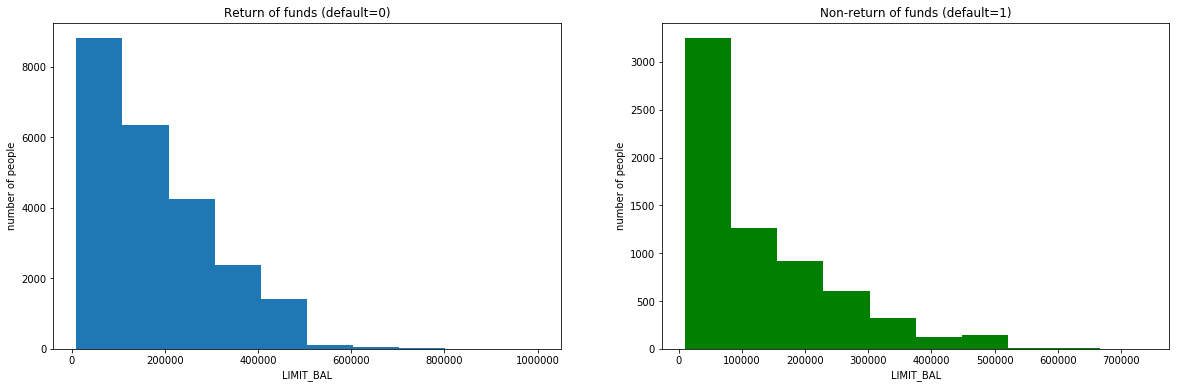

In [89]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

axes[0].set_xlabel('LIMIT_BAL')
axes[0].set_ylabel('number of people')
axes[0].set_title('Return of funds (default=0)')
axes[0].hist(credit_lb_default_0)

axes[1].set_xlabel('LIMIT_BAL')
axes[1].set_ylabel('number of people')
axes[1].set_title('Non-return of funds (default=1)')
axes[1].hist(credit_lb_default_1, color='green')
plt.show()

 **a) о равенстве медианных значений кредитного лимита с помощью подходящей интервальной оценки**

In [90]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [92]:
default_0 = list(map(np.median, get_bootstrap_samples(credit_lb_default_0.values, 10000)))
default_1 = list(map(np.median, get_bootstrap_samples(credit_lb_default_1.values, 10000)))

In [93]:
print ("95% confidence interval for the incindent median:",  stat_intervals(default_0, 0.05))
print ("95% confidence interval for the not incindent median:",  stat_intervals(default_1, 0.05))

95% confidence interval for the incindent median: [150000. 150000.]
95% confidence interval for the not incindent median: [80000. 90000.]


In [94]:
print ("difference between median:", np.median(default_0) - np.median(default_1))

difference between median: 60000.0


In [95]:
delta_median_scores = list(map(lambda x: x[1] - x[0], zip(default_0, default_1)))

In [96]:
print ("95% confidence interval for the difference between median",  stat_intervals(delta_median_scores, 0.05))

95% confidence interval for the difference between median [-70000. -60000.]


Ответ: проведенный анализ показывает с 95% вероятностью то, что доверительные интервалы для медиан не пересекаются

**б) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних**

In [97]:
# compare samples
stat, p = mannwhitneyu(credit_lb_default_0, credit_lb_default_1)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=59257217.500, p=0.000
Different distribution (reject H0)


Ответ: уверенно можно отвергнуть нулевую гипотезу о равенстве выборок

### 2. Пол

Пол (SEX): Проверьте гипотезу о том, что гендерный состав группы людей вернувших и не вернувших кредит отличается. Хорошо, если вы предоставите несколько различных решений этой задачи (с помощью доверительного интервала и подходящего статистического критерия)

In [98]:
credit_sex_default_0 = credit.SEX[credit.default==0]
credit_sex_default_1 = credit.SEX[credit.default==1]

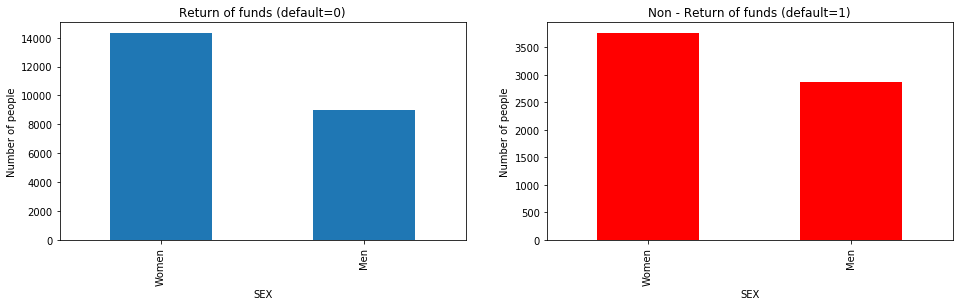

In [99]:
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
credit_sex_default_0.value_counts().plot(kind='bar')
plt.xticks([ 0, 1], ('Women', 'Men'))
plt.title('Return of funds (default=0)')
plt.xlabel('SEX')
plt.ylabel('Number of people')


plt.subplot(1,2,2)
credit_sex_default_1.value_counts().plot(kind='bar', color='red')
plt.xticks([ 0, 1], ('Women', 'Men'))
plt.title('Non - Return of funds (default=1)')
plt.xlabel('SEX')
plt.ylabel('Number of people')

plt.show()

In [100]:
from statsmodels.stats.proportion import proportion_confint

In [101]:
conf_interval_woman_0 = proportion_confint(credit_sex_default_0.value_counts()[2], 
                                            credit_sex_default_0.shape[0],
                                            method = 'wilson')
conf_interval_woman_1 = proportion_confint(credit_sex_default_1.value_counts()[2], 
                                            credit_sex_default_1.shape[0],
                                            method = 'wilson')

In [102]:
credit_lb_default_0_1 = [1] * credit_sex_default_0.value_counts()[2]
credit_lb_default_0_0 = [0]*(credit_sex_default_0.shape[0] - credit_sex_default_0.value_counts()[2])
credit_lb_default_0 = credit_lb_default_0_1 + credit_lb_default_0_0
print(len(credit_lb_default_0))

credit_lb_default_1_1 = [1] * credit_sex_default_1.value_counts()[2]
credit_lb_default_1_0 = [0]*(credit_sex_default_1.shape[0] - credit_sex_default_1.value_counts()[2])
credit_lb_default_1 = credit_lb_default_1_1 + credit_lb_default_1_0
print(len(credit_lb_default_1))

23364
6636


In [103]:
print ('95%% confidence interval for a click probability, women Return of funds: [%f, %f]' % conf_interval_woman_0)
print ('95%% confidence interval for a click probability, women Non - Return of funds: [%f, %f]' % conf_interval_woman_1)

95% confidence interval for a click probability, women Return of funds: [0.607890, 0.620373]
95% confidence interval for a click probability, women Non - Return of funds: [0.555102, 0.578938]


In [104]:
def proportions_diff_confint_ind(sample1, sample2, alpha = 0.05):    
    z = scipy.stats.norm.ppf(1 - alpha / 2.)
    
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)

In [105]:
def proportions_diff_z_stat_ind(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    
    p1 = float(sum(sample1)) / n1
    p2 = float(sum(sample2)) / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))

In [106]:
def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - scipy.stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return scipy.stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - scipy.stats.norm.cdf(z_stat)

In [107]:
print ("95%% confidence interval for a difference between proportions: [%f, %f]" %\
      proportions_diff_confint_ind(credit_lb_default_0, credit_lb_default_1))

95% confidence interval for a difference between proportions: [0.033635, 0.060548]


95% доверительный интервал для разницы долей женщин в двух группах=[0.033635, 0.060548]

In [108]:
z_stat = proportions_diff_z_stat_ind(credit_lb_default_0, credit_lb_default_1)

In [109]:
proportions_diff_z_test(z_stat)

4.472866521609831e-12

Так как полученый уровень значительно меньше 0.05, то это позволяет отвергнуть нулевую гипотезу о равенстве долей женщин в неплатильшиках в двух выборках.

### 3.Образование

Образование (EDUCATION): Проверьте гипотезу о том, что образование не влияет на то, вернет ли человек долг. Предложите способ наглядного представления разницы в ожидаемых и наблюдаемых значениях количества человек вернувших и не вернувших долг. Например, составьте таблицу сопряженности "образование" на "возврат долга", где значением ячейки была бы разность между наблюдаемым и ожидаемым количеством человек. Как бы вы предложили модифицировать таблицу так, чтобы привести значения ячеек к одному масштабу не потеряв в интерпретируемости ? Наличие какого образования является наилучшим индикатором того, что человек отдаст долг ? наоборт, не отдаст долг ?

In [110]:
credit_education_default_0 = credit.EDUCATION[credit.default==0]
credit_education_default_1 = credit.EDUCATION[credit.default==1]

In [190]:
ced_0 = credit_education_default_0.value_counts().sort_index()
ced_1 = credit_education_default_1.value_counts()
ced_1[0]=0
ced_1 = ced_1.sort_index()

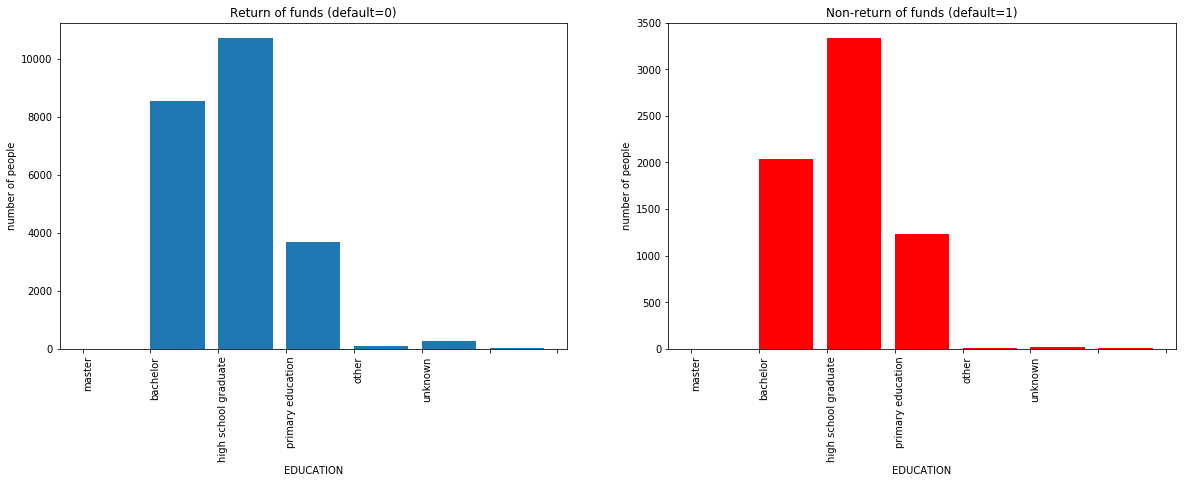

In [329]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

axes[0].set_xlabel('EDUCATION')
axes[0].set_ylabel('number of people')
axes[0].set_title('Return of funds (default=0)')
axes[0].bar(ced_0.index, ced_0.values, align='edge')
axes[0].set_xticklabels(("doctor", "master", "bachelor", "high school graduate", "primary education",
                         "other", "unknown"), rotation=90, ha='left')

axes[1].set_xlabel('EDUCATION')
axes[1].set_ylabel('number of people')
axes[1].set_title('Non-return of funds (default=1)')
axes[1].bar(ced_1.index, ced_1.values, align='edge', color='red')
axes[1].set_xticklabels(("doctor", "master", "bachelor", "high school graduate", "primary education",
                         "other", "unknown"), rotation=90, ha='left')
plt.show()

In [252]:
table = pd.crosstab(credit['EDUCATION'], credit['default'], margins = False)
table

default,0,1
EDUCATION,,
0,14,0
1,8549,2036
2,10700,3330
3,3680,1237
4,116,7
5,262,18
6,43,8


In [253]:
chi2, prob, df, expected = scipy.stats.chi2_contingency(table)
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"

print(output.format( chi2, df, prob))

print(expected)

test Statistics: 163.21655786997073
degrees of freedom: 6
p-value: 1.2332626245415605e-32

[[1.0903200e+01 3.0968000e+00]
 [8.2435980e+03 2.3414020e+03]
 [1.0926564e+04 3.1034360e+03]
 [3.8293596e+03 1.0876404e+03]
 [9.5792400e+01 2.7207600e+01]
 [2.1806400e+02 6.1936000e+01]
 [3.9718800e+01 1.1281200e+01]]


In [304]:
table_proportion = table/table.sum()
#table_proportion.columns = ['Return', 'Non-Return']
table_proportion.rename(index = {0 : "doctor", 1 : "master", 2 : "bachelor", 3 : "high school graduate",
                      4 : "primary education", 5 : "other", 6 : "unknown"}, inplace=True)
table_proportion.columns = ['Return', 'Non-Return']
table_proportion['delta'] = table_proportion['Return'] - table_proportion['Non-Return']
table_proportion

,Return,Non-Return,delta
EDUCATION,,,
doctor,0.000599,0.000000,0.000599
master,0.365905,0.306811,0.059093
bachelor,0.457970,0.501808,-0.043839
high school graduate,0.157507,0.186407,-0.028900
primary education,0.004965,0.001055,0.003910
other,0.011214,0.002712,0.008501
unknown,0.001840,0.001206,0.000635


In [305]:
label = ["doctor", "master", "bachelor", "high school graduate", "primary education", "other", "unknown"]
expected_round = np.around(expected)
table_expected = pd.DataFrame(data = expected_round, index = label, columns = ['Return', 'Non-Return'])
table_proportion_expected = table_expected/table_expected.sum()
table_proportion_expected['delta'] = table_proportion_expected['Return'] - table_proportion_expected['Non-Return']
table_proportion_expected

,Return,Non-Return,delta
doctor,0.000471,0.000452,0.000019
master,0.352835,0.352826,0.000010
bachelor,0.467665,0.467671,-0.000006
high school graduate,0.163878,0.163979,-0.000101
primary education,0.004109,0.004069,0.000039
other,0.009330,0.009344,-0.000014
unknown,0.001712,0.001658,0.000054


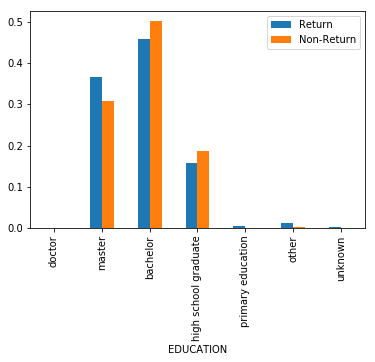

In [257]:
table_proportion.plot.bar()
plt.show()

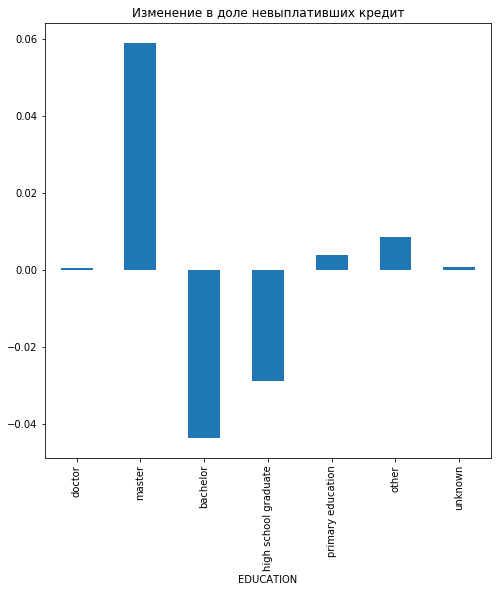

In [321]:
table_proportion.delta.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)
plt.title("Изменение в доле невыплативших кредит")
plt.show()

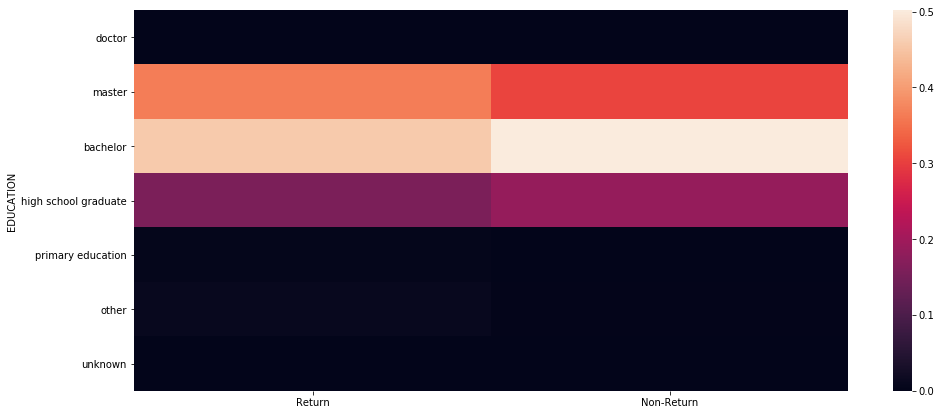

In [319]:
plt.figure(figsize=(16,7))
sns.heatmap(table_proportion[['Return', 'Non-Return']])
plt.show()

Уровень значимости для полученной статистики Хи квадрат (1.2e-32) значительно ниже 0.05, что позволяет уверенно отвергнуть гипотезу о том, что признаки независимы.

Полученные графики показывают, что невозврат кредитов растет у бакалавров и выпускников школ по сравнению с магистрами. В остальных категориях достаточно сложно оценить, так как количество участников небольшое.

Практическая значимость достаточно небольшая, так как изменения в пределах 5%


### 4. Семейное положение 

Семейное положение (MARRIAGE): Проверьте, как связан семейный статус с индикатором дефолта: нужно предложить меру, по которой можно измерить возможную связь этих переменных и посчитать ее значение.

In [322]:
credit_marriage_default_0 = credit.MARRIAGE[credit.default==0]
credit_marriage_default_1 = credit.MARRIAGE[credit.default==1]

In [339]:
label = ["refuse to answer", "married", "single", "unknown"]

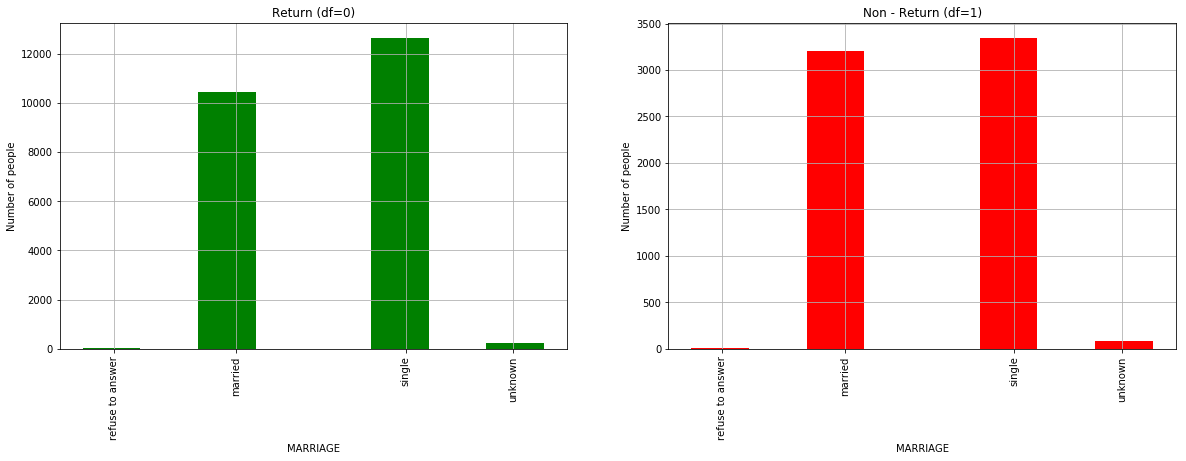

In [378]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

plt.subplot(1,2,1)
plt.grid()
plt.hist(credit_marriage_default_0, color = 'g', bins=8)
plt.xticks([ 0.2, 1.0, 2.1, 2.8], ("refuse to answer", "married", "single", "unknown"), rotation=90)
plt.title('Return (df=0)')
plt.xlabel('MARRIAGE')
plt.ylabel('Number of people')

plt.subplot(1,2,2)
plt.grid()
plt.hist(credit_marriage_default_1, color = 'r', bins=8)
plt.xticks([ 0.2, 1.0, 2.1, 2.8], ("refuse to answer", "married", "single", "unknown"), rotation=90)
plt.title('Non - Return (df=1)')
plt.xlabel('MARRIAGE')
plt.ylabel('Number of people')

plt.show()

По графикам можно прийти к выводу, что среди платильщиков больше одиноких, а вот среди неплатильщиков количество людей приблизительно равно

In [406]:
table = pd.crosstab(credit['MARRIAGE'], credit['default'], margins = False)
table_sum = pd.crosstab(credit['MARRIAGE'], credit['default'], margins = True)
table_sum

default,0,1,All
MARRIAGE,,,
0,49,5,54
1,10453,3206,13659
2,12623,3341,15964
3,239,84,323
All,23364,6636,30000


In [380]:
chi2, prob, df, expected = scipy.stats.chi2_contingency(table)
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"

print(output.format( chi2, df, prob))

print(expected)

test Statistics: 35.66239583433609
degrees of freedom: 3
p-value: 8.825862457577375e-08

[[4.20552000e+01 1.19448000e+01]
 [1.06376292e+04 3.02137080e+03]
 [1.24327632e+04 3.53123680e+03]
 [2.51552400e+02 7.14476000e+01]]


In [382]:
table_proportion = table/table.sum()
table_proportion.rename(index = {0 : "refuse to answer", 1 : "married", 2 : "single", 3 : "unknown"}, inplace=True)
table_proportion.columns = ['Return', 'Non-Return']
table_proportion['delta'] = table_proportion['Return'] - table_proportion['Non-Return']
table_proportion

,Return,Non-Return,delta
MARRIAGE,,,
refuse to answer,0.002097,0.000753,0.001344
married,0.447398,0.483122,-0.035725
single,0.540276,0.503466,0.036810
unknown,0.010229,0.012658,-0.002429


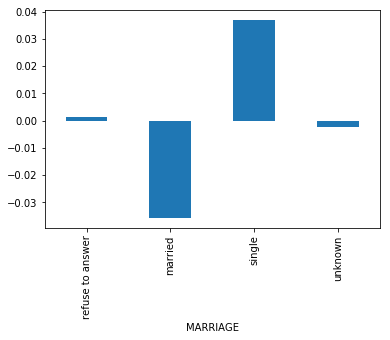

In [387]:
table_proportion.delta.plot.bar()
plt.show()

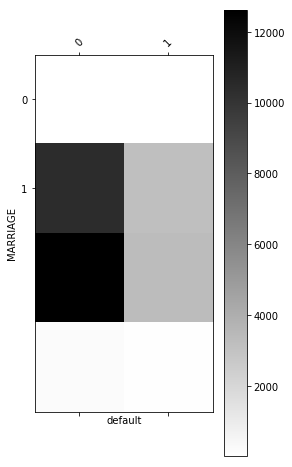

In [408]:
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion, cmap=cmap) # imshow
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    #plt.tight_layout()
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)

plot_confusion_matrix(table)

In [411]:
def cramers_v(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = scipy.stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [417]:
print("Коэфициент Крамера равен ", cramers_v(table.values))

Коэфициент Крамера равен  0.03299665874336609


Графики показывали, что доля платильщиков среди неженатых больше, чем женатых, но незначительно. Так же согласно полученному уровню значимости коэффициента Хи квадрат - признаки зависимые. Полученное значение коэффициента Крамера показывает о малой взаимосвязи об уплате кредита и статусом семейного положения

### 5. Возраст (AGE)

Возраст (AGE): Относительно двух групп людей вернувших и не вернувших кредит проверьте следующие гипотезы: a) о равенстве медианных значений возрастов людей b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. Значимы ли полученные результаты с практической точки зрения ?

In [418]:
credit_age_default_0 = credit.AGE[credit.default==0]
credit_age_default_1 = credit.AGE[credit.default==1]

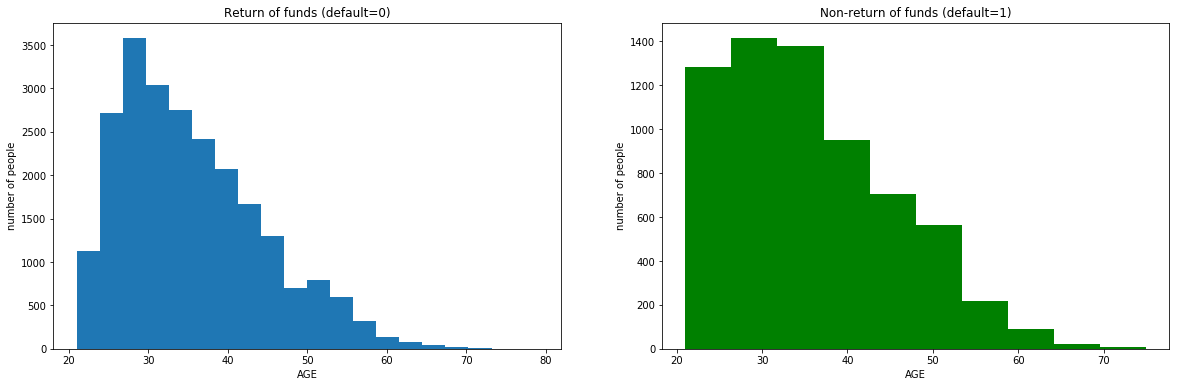

In [420]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

axes[0].set_xlabel('AGE')
axes[0].set_ylabel('number of people')
axes[0].set_title('Return of funds (default=0)')
axes[0].hist(credit_age_default_0, bins=20)

axes[1].set_xlabel('AGE')
axes[1].set_ylabel('number of people')
axes[1].set_title('Non-return of funds (default=1)')
axes[1].hist(credit_age_default_1, color='green')
plt.show()

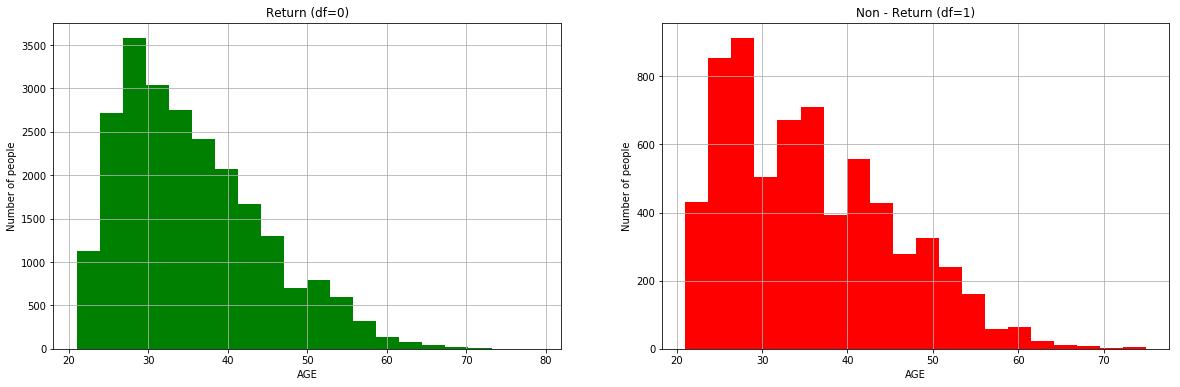

In [422]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

plt.subplot(1,2,1)
plt.grid()
plt.hist(credit_age_default_0, color = 'g', bins=20)
#plt.xticks([ 0.2, 1.0, 2.1, 2.8], ("refuse to answer", "married", "single", "unknown"), rotation=90)
plt.title('Return (df=0)')
plt.xlabel('AGE')
plt.ylabel('Number of people')

plt.subplot(1,2,2)
plt.grid()
plt.hist(credit_age_default_1, color = 'r', bins=20)
#plt.xticks([ 0.2, 1.0, 2.1, 2.8], ("refuse to answer", "married", "single", "unknown"), rotation=90)
plt.title('Non - Return (df=1)')
plt.xlabel('AGE')
plt.ylabel('Number of people')

plt.show()

В принципе распределения одинаковые, не считая локальных различий

 a) о равенстве медианных значений возрастов людей

In [426]:
default_0 = list(map(np.median, get_bootstrap_samples(credit_age_default_0.values, 1000)))
default_1 = list(map(np.median, get_bootstrap_samples(credit_age_default_1.values, 1000)))
print ("95% confidence interval for the incindent median:",  stat_intervals(default_0, 0.05))
print ("95% confidence interval for the not incindent median:",  stat_intervals(default_1, 0.05))
print ("difference between median:", np.median(default_0) - np.median(default_1))
delta_median_scores = list(map(lambda x: x[1] - x[0], zip(default_0, default_1)))
print ("95% confidence interval for the difference between median",  stat_intervals(delta_median_scores, 0.05))

95% confidence interval for the incindent median: [34. 34.]
95% confidence interval for the not incindent median: [34. 35.]
difference between median: 0.0
95% confidence interval for the difference between median [0. 1.]


На основании полученных данных мы не можем сделать вывод, что медианы различны

б) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. Значимы ли полученные результаты с практической точки зрения

In [427]:
# compare samples
stat, p = mannwhitneyu(credit_age_default_0, credit_age_default_1)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=76966879.500, p=0.186
Same distribution (fail to reject H0)


Согласно полученному уровню значимости отвергнуть нулевую гипотезу на уровне 0,05 не можем. С практической точки зрения о возврате/невозврате кредита по одному возрасту не предсталяется возможной